In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Predictions for full dataset

In [2]:
cocoa_train = pd.read_csv("Chocolate Data Files/ChocolateCleanOfficial1.csv")
cocoa_test = pd.read_csv("Chocolate Data Files/scoring_data_clean1.csv")

In [ ]:
del cocoa_train['ingredient_vanilla']
del cocoa_test['id'] 

In [3]:
amount_to_split = cocoa_test.shape[0]

X = cocoa_train.drop(['rating'], axis = 1)
Y = cocoa_train['rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=amount_to_split, random_state=4) 


In [24]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(cocoa_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- ingredient_vanilla 

  warnings.warn(message, FutureWarning)


In [5]:
# Calculate the absolute errors
errors = abs(predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(predictions[:5])

Mean Absolute Error: 0.48 degrees.
Accuracy: 85.42 %.
[2.91915774 2.74711607 2.74961607 2.6535     2.775625  ]


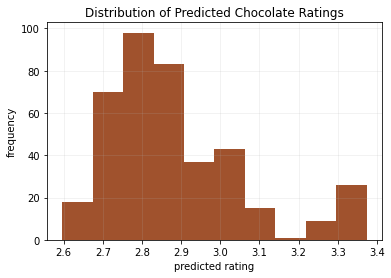

In [6]:
plt.hist(predictions,bins=10,color="sienna")
plt.grid(True,alpha=0.2)
plt.title("Distribution of Predicted Chocolate Ratings")
plt.xlabel("predicted rating")
plt.ylabel("frequency")
plt.savefig("Plots/pred_hist.jpeg",dpi=300)

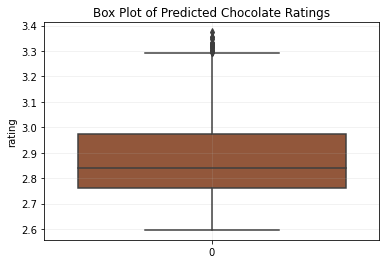

In [7]:
sns.boxplot(data=predictions,color="sienna")
plt.title("Box Plot of Predicted Chocolate Ratings")
plt.ylabel("rating")
plt.grid(True,alpha=0.2)
plt.savefig("Plots/pred_boxplot.jpeg",dpi=300)

In [23]:
predictions_series = pd.DataFrame({"predictions":predictions})
predictions_series.describe()

,predictions
count,400.000000
mean,2.882236
std,0.173361
min,2.596304
25%,2.761376
50%,2.838783
75%,2.974335
max,3.374000


In [19]:
final_ratings = pd.DataFrame({"id":range(10001,10401),"predicted_rating":predictions})
final_ratings.to_csv("Outputs/final_predictions.csv",index=False)
final_ratings.to_csv("Final Submission/crunch_the_numbers_bar.csv",index=False)